## Exploratory Data Analysis on Trump's Tweet

### Goals

1. What are the top 20 most used words in the data? And how do they change over the time period?
2. Whether there are different people running Trump’s account: eg. sending device, time period, tweet?

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import math
import datetime

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
plt.rcParams.update({'font.size': 22})

plt.style.use('seaborn')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

### Viewing the Data

In [2]:
trump_tweets = pd.read_csv("data/tweets_scraped_11_07_2019.csv", index_col='id_str')
print(len(trump_tweets))

12323


In [3]:
trump_tweets

,source,text,created_at,retweet_count,favorite_count,is_retweet
id_str,,,,,,
796315640307060738,Twitter for Android,Such a beautiful and important evening! The fo...,11-09-2016 11:36:58,220796,633253,False
796797436752707585,Twitter for iPhone,Happy 241st birthday to the U.S. Marine Corps!...,11-10-2016 19:31:27,45576,169729,False
796897928048766976,Twitter for Android,A fantastic day in D.C. Met with President Oba...,11-11-2016 02:10:46,37788,192638,False
796900183955095552,Twitter for Android,Just had a very open and successful presidenti...,11-11-2016 02:19:44,69498,231526,False
797034721075228672,Twitter for Android,Love the fact that the small groups of protest...,11-11-2016 11:14:20,55954,221718,False
...,...,...,...,...,...,...
1192460764235419654,Twitter for iPhone,It was just explained to me that for next week...,11-07-2019 15:16:15,17716,59582,False
1192461425358385154,Twitter for iPhone,THANK YOU! #MAGA https://t.co/e6dZshYFMV,11-07-2019 15:18:53,6548,26575,False
1192463709400117250,Twitter for iPhone,The Amazon Washington Post and three lowlife r...,11-07-2019 15:27:57,12082,38697,False


In [4]:
trump_tweets['created_at'] = pd.to_datetime(trump_tweets['created_at'])

In [5]:
trump_tweets.describe()

,retweet_count,favorite_count
count,12323.000000,12323.000000
mean,18573.566339,67049.472125
std,12417.851632,52784.541328
min,2.000000,0.000000
25%,11316.000000,28964.500000
50%,16690.000000,69022.000000
75%,23166.000000,96076.500000
max,369530.000000,879647.000000


### Word Frequency Analysis

We're hoping to have a sense of the topics that Donald Trump touch upon the most. From a generic sense, the words in Trump's tweet demonstrates the topic about which a tweet is concerning. We want to have a sense of Trump's favorite topics by seeing what his favorite words are. Furthermore, by tracking the frequency trend of a speicific word, we can also understand which topics were Trump paying attention to. For example, if Trump's tweets see an increasing frequency of words regarding international trade, stock market, U.S. and world economy, then it means that he may be paying more attention to similar topics. This increased attention would be likely correlated to the VIX index. Therefore, in this section, we lay the groundwork for the word frequency analysis, identifying popular words used by Donald Trump.

To achieve the goal, we use `textblob` package. We then inflect and lemmatize the textblob we got from the package for a word frequency analysis, to remove the impact of tenses and other factors.

To approach this problem, we first concatnate all of Donald Trump's tweets, and produce a textblob containing all of our collected tweets. We then extract all the nouns in the text blobs, since we're hoping to identify the prominent topics he's interested in, and nouns will give us the best insights of that. After extracting nouns, we singularize and lemmatize the nouns to ensure that all similar nouns with the same root are treated in the same way.

In [7]:
from textblob import TextBlob, Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/dylandemarco/nltk_data'
    - '/Users/dylandemarco/PSets/Venvs/CS109Venv/nltk_data'
    - '/Users/dylandemarco/PSets/Venvs/CS109Venv/share/nltk_data'
    - '/Users/dylandemarco/PSets/Venvs/CS109Venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
trump_tweets['text_blob'] = trump_tweets['text'].apply(lambda text: TextBlob(text))

In [ ]:
trump_tweets['words'] = trump_tweets['text_blob'].apply(lambda text_blob: text_blob.words.singularize().lemmatize())

In [ ]:
trump_tweets['noun_phrases'] = trump_tweets['text_blob'].apply(lambda text_blob: text_blob.noun_phrases)

In [ ]:
trump_tweets['noun_phrases'] = trump_tweets['noun_phrases'].apply(lambda noun_list: noun_list.singularize().lemmatize())

In [ ]:
all_trump_blob = TextBlob(trump_tweets['text'].str.cat())
all_trump_noun = all_trump_blob.noun_phrases
[word for word in all_trump_noun if word not in stops]
all_trump_noun = lemmatize().singularize()
# all_trump_nouns = all_trump_blob.noun_phrases.singularize().lemmatize()

# bow = CountVectorizer()
# BOW = bow.fit_transform(all_trump_blob)
# bagOFwords = pd.DataFrame(BOW.toarray())
# bagOFwords.columns = bow.get_feature_names()


# vectorizer = TfidfVectorizer()
# got_tfidf = vectorizer.fit_transform(list(all_trump_blob))
# tfidf = pd.DataFrame(got_tfidf.toarray())
# tfidf.columns = vectorizer.get_feature_names()


In [ ]:
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(all_trump_blob)

train_vect

In [ ]:
tfidf.get_feature_names()

If we do not remove the nouns in our corpus, the 20 most frequent word obtained by TF-IDF algorithm are:

In [ ]:
# print idf values
df_idf = pd.DataFrame(tfidf.idf_, index=tfidf.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'], ascending=False)


### Tweet Published By?

Whether a tweet is published by Trump would also influence people's judgment, thereby impacting the market. We assume that the tweets published by Trump himself would have the largest impact on the market. Twitter provides information regarding how the tweets were posted, and here we count how many tweets were published by each source. Comparing them and trying to infer who's posting the tweets appearing on @realdonaldtrump.

We find that most of the tweets were published by `Twitter for iPhone`, followed by `Twitter for Android`.

In [23]:
tweet_source = trump_tweets.groupby('source').count()['text']
tweet_source

source
Media Studio              155
Twitter Ads                34
Twitter Media Studio      119
Twitter Web App             4
Twitter Web Client         65
Twitter for Android       436
Twitter for iPad           38
Twitter for iPhone      11472
Name: text, dtype: int64

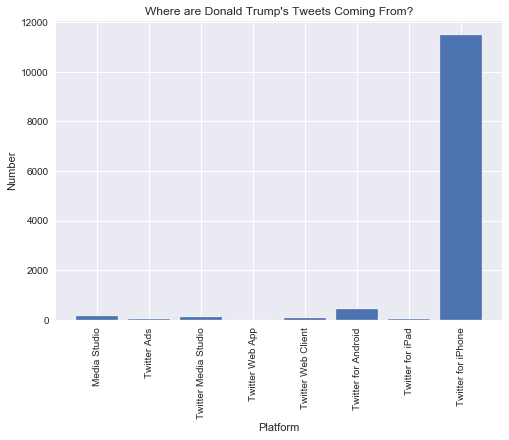

In [24]:
plt.bar(tweet_source.index, tweet_source)
plt.title('Where are Donald Trump\'s Tweets Coming From?')
plt.xlabel('Platform')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.show()

In [25]:
tweet_source.index.values

array(['Media Studio', 'Twitter Ads', 'Twitter Media Studio',
       'Twitter Web App', 'Twitter Web Client', 'Twitter for Android',
       'Twitter for iPad', 'Twitter for iPhone'], dtype=object)

In [26]:
trump_tweets['date'] = trump_tweets['created_at'].dt.date

trump_tweets['hour'] = trump_tweets['created_at'].dt.hour
trump_tweets['min'] = trump_tweets['created_at'].dt.minute

trump_tweets['time'] = trump_tweets.agg('{0[hour]}:{0[min]}'.format, axis=1)

In [27]:
trump_tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,date,hour,min,time
id_str,,,,,,,,,,
796315640307060738,Twitter for Android,Such a beautiful and important evening! The fo...,2016-11-09 11:36:58,220796,633253,False,2016-11-09,11,36,11:36
796797436752707585,Twitter for iPhone,Happy 241st birthday to the U.S. Marine Corps!...,2016-11-10 19:31:27,45576,169729,False,2016-11-10,19,31,19:31
796897928048766976,Twitter for Android,A fantastic day in D.C. Met with President Oba...,2016-11-11 02:10:46,37788,192638,False,2016-11-11,2,10,2:10
796900183955095552,Twitter for Android,Just had a very open and successful presidenti...,2016-11-11 02:19:44,69498,231526,False,2016-11-11,2,19,2:19
797034721075228672,Twitter for Android,Love the fact that the small groups of protest...,2016-11-11 11:14:20,55954,221718,False,2016-11-11,11,14,11:14


In [28]:
grouped_freq = trump_tweets.groupby(['date', 'source']).size()
grouped_df = pd.DataFrame(grouped_freq)

In [29]:
cleaned_df = pd.DataFrame(columns=['date', 'source', 'num'])

for i in range(len(grouped_freq)):
    
    num = grouped_df.iloc[i].values[0]
    date = grouped_df.iloc[i].name[0]
    source = grouped_df.iloc[i].name[1]
    
    cleaned_df = cleaned_df.append({'date': date,
                                   'source': source,
                                   'num': num}, ignore_index=True)
    

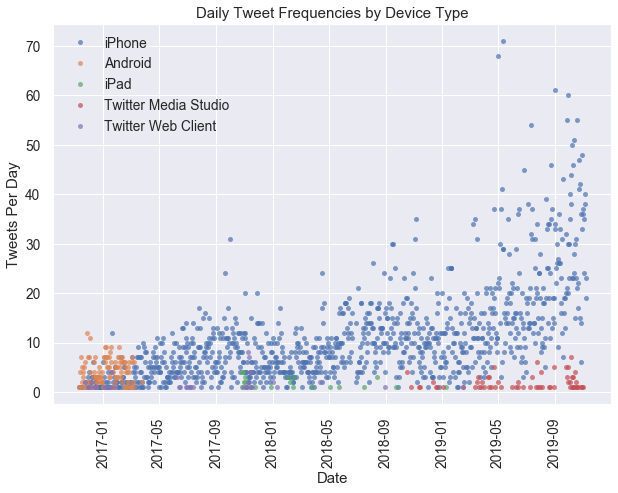

In [41]:
plt.figure(figsize=(10,7))
sns.set( font_scale=1.25)
iphone = cleaned_df[cleaned_df['source'] == 'Twitter for iPhone']
android = cleaned_df[cleaned_df['source'] == 'Twitter for Android']
ipad = cleaned_df[cleaned_df['source'] == 'Twitter for iPad']
tms = cleaned_df[cleaned_df['source'] == 'Twitter Media Studio']
twc = cleaned_df[cleaned_df['source'] == 'Twitter Web Client']  

plt.plot_date(iphone['date'], iphone['num'], markersize = 5, alpha=0.7, label = 'iPhone')
plt.plot_date(android['date'], android['num'], markersize = 5, alpha=0.7, label = 'Android')
plt.plot_date(ipad['date'], ipad['num'], markersize = 5, alpha=0.7, label = 'iPad')
plt.plot_date(tms['date'], tms['num'], markersize = 5, alpha=0.7, label = 'Twitter Media Studio')
plt.plot_date(twc['date'], twc['num'], markersize = 5, alpha=0.7, label = 'Twitter Web Client')
plt.xticks(rotation = 'vertical')

plt.title("Daily Tweet Frequencies by Device Type")
plt.xlabel("Date")
plt.ylabel("Tweets Per Day")

plt.legend()
plt.show()

In [53]:
tgrouped_freq = trump_tweets.groupby(['hour', 'source']).size()
tgrouped_df = pd.DataFrame(tgrouped_freq)
tcleaned_df = pd.DataFrame()

for i in range(len(tgrouped_df)):
    
    num = tgrouped_df.iloc[i].values[0]
    hour = tgrouped_df.iloc[i].name[0]
    source = tgrouped_df.iloc[i].name[1]
    
    tcleaned_df = tcleaned_df.append({'hour': hour,
                                   'source': source,
                                   'num': num}, ignore_index=True)


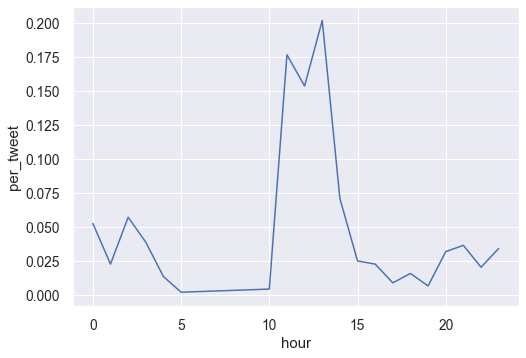

In [74]:
d_df = trump_tweets.groupby(['hour', 'source']).count().reset_index()

android_tweets = d_df.loc[d_df.source == "Twitter for Android"].copy()

android_tweets['per_tweet'] = android_tweets.created_at / android_tweets.created_at.sum()
sns.lineplot(x=android_tweets.hour, y=android_tweets.per_tweet)


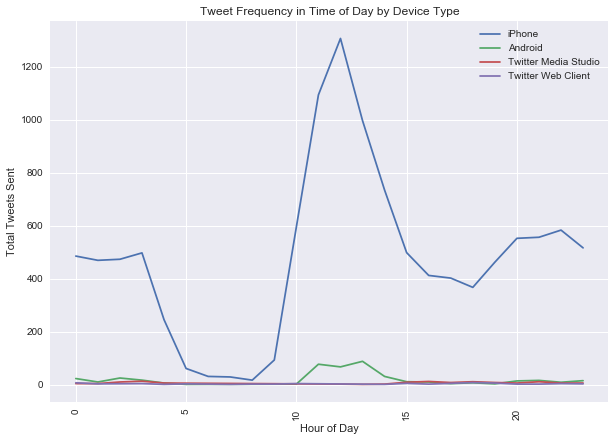

In [32]:
plt.figure(figsize=(10,7))

plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['num'], markersize = 3, label = 'iPhone')
plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['num'], markersize = 3, label = 'Android')
plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter Media Studio']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter Media Studio']['num'], markersize = 3, label = 'Twitter Media Studio')
plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter Web Client']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter Web Client']['num'], markersize = 3, label = 'Twitter Web Client')


# plt.plot_date(android['date'], android['num'], markersize = 3, label = 'Android')
# plt.plot_date(ipad['date'], ipad['num'], markersize = 3, label = 'iPad')
# plt.plot_date(tms['date'], tms['num'], markersize = 3, label = 'Twitter Media Studio')
# plt.plot_date(twc['date'], twc['num'], markersize = 3, label = 'Twitter Web Client')
plt.xticks(rotation = 'vertical')

plt.title("Tweet Frequency in Time of Day by Device Type")
plt.xlabel("Hour of Day")
plt.ylabel("Total Tweets Sent")

plt.legend()
plt.show()

#### REMOVING RETWEETS AND HREFS

In [42]:
un_rt = trump_tweets[trump_tweets['is_retweet']  == False]

un_rt['linked'] = un_rt['text'].str.contains('https://t.co/') == True

# un_rt['id_str'] = un_rt['id_str'].astype(str)

un_rt_href = un_rt[un_rt['text'].str.contains('https://t.co/') == False]

/Users/dylandemarco/PSets/Venvs/CS109Venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
un_rt['text'] = un_rt['text'].str.lower()

un_rt

/Users/dylandemarco/PSets/Venvs/CS109Venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,source,text,created_at,retweet_count,favorite_count,is_retweet,date,hour,min,time,linked
id_str,,,,,,,,,,,
796315640307060738,Twitter for Android,such a beautiful and important evening! the fo...,2016-11-09 11:36:58,220796,633253,False,2016-11-09,11,36,11:36,False
796797436752707585,Twitter for iPhone,happy 241st birthday to the u.s. marine corps!...,2016-11-10 19:31:27,45576,169729,False,2016-11-10,19,31,19:31,True
796897928048766976,Twitter for Android,a fantastic day in d.c. met with president oba...,2016-11-11 02:10:46,37788,192638,False,2016-11-11,2,10,2:10,False
796900183955095552,Twitter for Android,just had a very open and successful presidenti...,2016-11-11 02:19:44,69498,231526,False,2016-11-11,2,19,2:19,False
797034721075228672,Twitter for Android,love the fact that the small groups of protest...,2016-11-11 11:14:20,55954,221718,False,2016-11-11,11,14,11:14,False
...,...,...,...,...,...,...,...,...,...,...,...
1192460764235419654,Twitter for iPhone,it was just explained to me that for next week...,2019-11-07 15:16:15,17716,59582,False,2019-11-07,15,16,15:16,False
1192461425358385154,Twitter for iPhone,thank you! #maga https://t.co/e6dzshyfmv,2019-11-07 15:18:53,6548,26575,False,2019-11-07,15,18,15:18,True
1192463709400117250,Twitter for iPhone,the amazon washington post and three lowlife r...,2019-11-07 15:27:57,12082,38697,False,2019-11-07,15,27,15:27,False


In [44]:
un_rt

,source,text,created_at,retweet_count,favorite_count,is_retweet,date,hour,min,time,linked
id_str,,,,,,,,,,,
796315640307060738,Twitter for Android,such a beautiful and important evening! the fo...,2016-11-09 11:36:58,220796,633253,False,2016-11-09,11,36,11:36,False
796797436752707585,Twitter for iPhone,happy 241st birthday to the u.s. marine corps!...,2016-11-10 19:31:27,45576,169729,False,2016-11-10,19,31,19:31,True
796897928048766976,Twitter for Android,a fantastic day in d.c. met with president oba...,2016-11-11 02:10:46,37788,192638,False,2016-11-11,2,10,2:10,False
796900183955095552,Twitter for Android,just had a very open and successful presidenti...,2016-11-11 02:19:44,69498,231526,False,2016-11-11,2,19,2:19,False
797034721075228672,Twitter for Android,love the fact that the small groups of protest...,2016-11-11 11:14:20,55954,221718,False,2016-11-11,11,14,11:14,False
...,...,...,...,...,...,...,...,...,...,...,...
1192460764235419654,Twitter for iPhone,it was just explained to me that for next week...,2019-11-07 15:16:15,17716,59582,False,2019-11-07,15,16,15:16,False
1192461425358385154,Twitter for iPhone,thank you! #maga https://t.co/e6dzshyfmv,2019-11-07 15:18:53,6548,26575,False,2019-11-07,15,18,15:18,True
1192463709400117250,Twitter for iPhone,the amazon washington post and three lowlife r...,2019-11-07 15:27:57,12082,38697,False,2019-11-07,15,27,15:27,False


In [45]:
unhrefrt_grouped_freq = un_rt_href.groupby(['hour', 'source']).size()
unref_df = pd.DataFrame(unhrefrt_grouped_freq)
unref_df_cl = pd.DataFrame()

for i in range(len(unref_df)):
    
    num = unref_df.iloc[i].values[0]
    hour = unref_df.iloc[i].name[0]
    source = unref_df.iloc[i].name[1]
    
    unref_df_cl = unref_df_cl.append({'hour': hour,
                                   'source': source,
                                   'num': num}, ignore_index=True)


In [46]:
unref_df_cl

,hour,num,source
0,0.0,4.0,Twitter Web Client
1,0.0,23.0,Twitter for Android
2,0.0,244.0,Twitter for iPhone
3,1.0,3.0,Twitter Web Client
4,1.0,10.0,Twitter for Android
...,...,...,...
56,22.0,9.0,Twitter for Android
57,22.0,316.0,Twitter for iPhone
58,23.0,2.0,Twitter Web Client
59,23.0,15.0,Twitter for Android


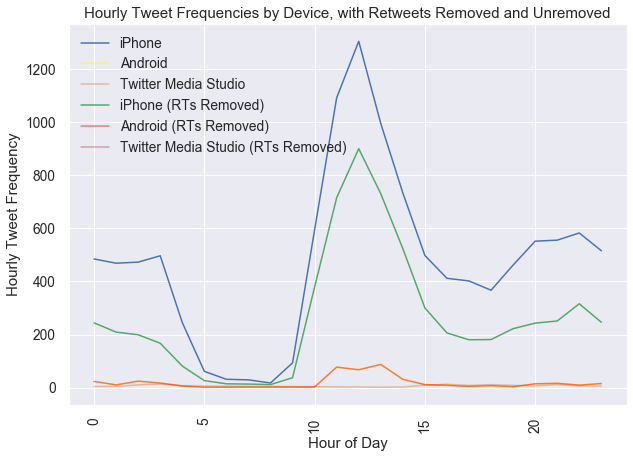

In [51]:
plt.figure(figsize=(10,7))

plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['num'], markersize = 3, label = 'iPhone')
plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['num'], markersize = 3, alpha = 0.5, color="yellow", label = 'Android' )
plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter Media Studio']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter Media Studio']['num'], markersize = 3, alpha =0.5, label = 'Twitter Media Studio')


plt.plot(unref_df_cl[unref_df_cl['source'] == 'Twitter for iPhone']['hour'], 
         unref_df_cl[unref_df_cl['source'] == 'Twitter for iPhone']['num'], markersize = 3, label = 'iPhone (RTs Removed)')
plt.plot(unref_df_cl[unref_df_cl['source'] == 'Twitter for Android']['hour'], 
         unref_df_cl[unref_df_cl['source'] == 'Twitter for Android']['num'], markersize = 3, alpha =0.5, color="red", label = 'Android (RTs Removed)')
plt.plot(unref_df_cl[unref_df_cl['source'] == 'Twitter Media Studio']['hour'], 
         unref_df_cl[unref_df_cl['source'] == 'Twitter Media Studio']['num'], markersize = 3, alpha =0.5,label = 'Twitter Media Studio (RTs Removed)')


# plt.plot_date(android['date'], android['num'], markersize = 3, label = 'Android')
# plt.plot_date(ipad['date'], ipad['num'], markersize = 3, label = 'iPad')
# plt.plot_date(tms['date'], tms['num'], markersize = 3, label = 'Twitter Media Studio')
# plt.plot_date(twc['date'], twc['num'], markersize = 3, label = 'Twitter Web Client')
plt.xticks(rotation = 'vertical')
plt.title("Hourly Tweet Frequencies by Device, with Retweets Removed and Unremoved")
plt.xlabel("Hour of Day")
plt.ylabel("Hourly Tweet Frequency")

plt.legend()
plt.show()

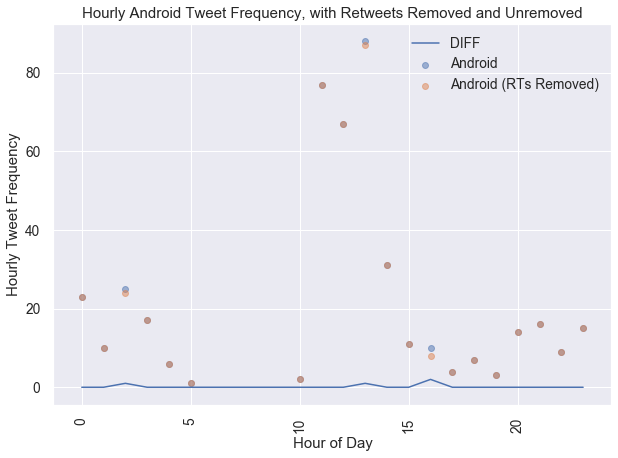

In [48]:
plt.figure(figsize=(10,7))

plt.scatter(tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['num'], alpha = 0.5, color="yellow", label = 'Android')
plt.scatter(unref_df_cl[unref_df_cl['source'] == 'Twitter for Android']['hour'], 
         unref_df_cl[unref_df_cl['source'] == 'Twitter for Android']['num'], alpha = 0.5, color="red", label = 'Android (RTs Removed)')
plt.xticks(rotation = 'vertical')

plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['hour'],
        (np.array(tcleaned_df[tcleaned_df['source'] == 'Twitter for Android']['num']) - 
         np.array(unref_df_cl[unref_df_cl['source'] == 'Twitter for Android']['num'])),
        label = "DIFF")

plt.title("Hourly Android Tweet Frequency, with Retweets Removed and Unremoved")
plt.xlabel("Hour of Day")
plt.ylabel("Hourly Tweet Frequency")


plt.legend()
plt.show()

**The highly overlapping nature between Android and the filtered Andriod tweet set indicates that these tweets are consistent with our expectation of Donald Trump's tweeting behavior - namely that he does not usually retweet or post images.**

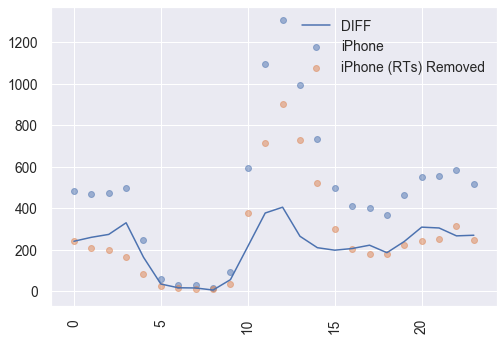

In [49]:
plt.scatter(tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['hour'], 
         tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['num'], alpha = 0.5, label = 'iPhone')
plt.scatter(unref_df_cl[unref_df_cl['source'] == 'Twitter for iPhone']['hour'], 
         unref_df_cl[unref_df_cl['source'] == 'Twitter for iPhone']['num'], alpha = 0.5, label = 'iPhone (RTs) Removed')

plt.plot(tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['hour'],
        (np.array(tcleaned_df[tcleaned_df['source'] == 'Twitter for iPhone']['num']) - 
         np.array(unref_df_cl[unref_df_cl['source'] == 'Twitter for iPhone']['num'])),
        label = "DIFF")

plt.xticks(rotation = 'vertical')

plt.legend()
plt.show()


In [ ]:
# un_rt.to_excel("un_rt.xlsx")

un_rt.to_pickle("not_retweeted_twitter.pickle")

In [ ]:
un_rt.sample(100).to_csv("sample.csv")


In [ ]:
un_rt['text'] = un_rt['text'].str.lower()

un_rt

In [ ]:
un_rt.id_str

### Creating Dummy Variable for Words

In [ ]:
word_list = ["stock", 'market', "agreement", "negotiator", "negotiation", 
             "trade", "china", "economy", "job", "tariff", "employment",
            "s&p", "auto", "farmer"]



In [ ]:
for num, word in enumerate(word_list):
    
    un_rt["exist_{}".format(word)] = (un_rt['text'].str.contains(word) == True).astype(int)
    

In [ ]:
un_rt.index.astype(str)

In [ ]:
un_rt

### Joining Sentiment Analysis

In [ ]:
sentiment = pd.read_pickle("joined.pickle")

In [ ]:
pd.merge(un_rt, sentiment[['hash', 'dot', 'polarity', 'favorite', 'id_str']], on='id_str')

# joined = un_rt.join(sentiment[['hash', 'dot', 'polarity', 'favorite', 'id_str']], on='id_str')


## Training Samples

In [ ]:

training_samples = pd.read_excel("training_score.xlsx", sheet_name="Roger", 
                                converters={'id_str':str})


In [ ]:
training_samples

In [ ]:
training_samples = training_samples.set_index('id_str')

In [ ]:
training_samples.to_pickle('legit_training_set.pickle')
